In [1]:
from df_utils import create_df_remote_control
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
variations = ["depth_direction", "lr_joystick"]
variant_names = ["Default", "Depth Car", "LR Joystick"]
fontsize = 15
all_variants = ["default"] + variations
cmap = plt.get_cmap('plasma')
values = np.linspace(0, len(all_variants), len(all_variants)) 
colors = {key: cmap(v / (len(all_variants)+0.5)) for key, v in zip(all_variants, values)}
plt.rcParams.update({'font.size': fontsize})

In [3]:
#read data
folder = os.path.abspath(f"../../simulators/")
sparse_df = {}
sparse_df["default"] = create_df_remote_control(["only_distance"])

for v in variations:
    sparse_df[v] = create_df_remote_control(["only_distance"], variation=v)

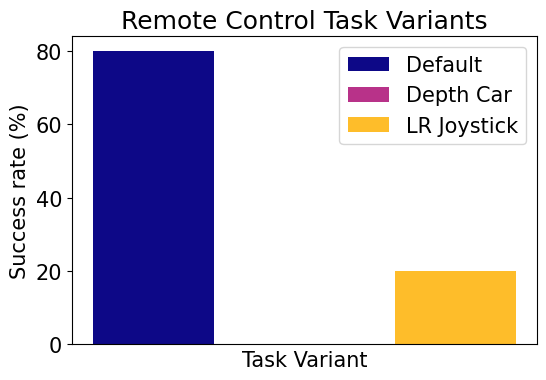

In [4]:
fig, ax = plt.subplots(figsize=(6, 4))

for i in range(len(all_variants)):
    ax.bar(i, sparse_df[all_variants[i]]['success'].mean()*100, color=colors[all_variants[i]], label=variant_names[i])

plt.title("Remote Control Task Variants")
plt.legend()
plt.yticks(fontsize=fontsize)
plt.xticks([])
plt.xlabel("Task Variant", fontsize=fontsize)
plt.ylabel("Success rate (%)", fontsize=fontsize)
plt.savefig("remote_control_variants/success_rates_bonus_dist")

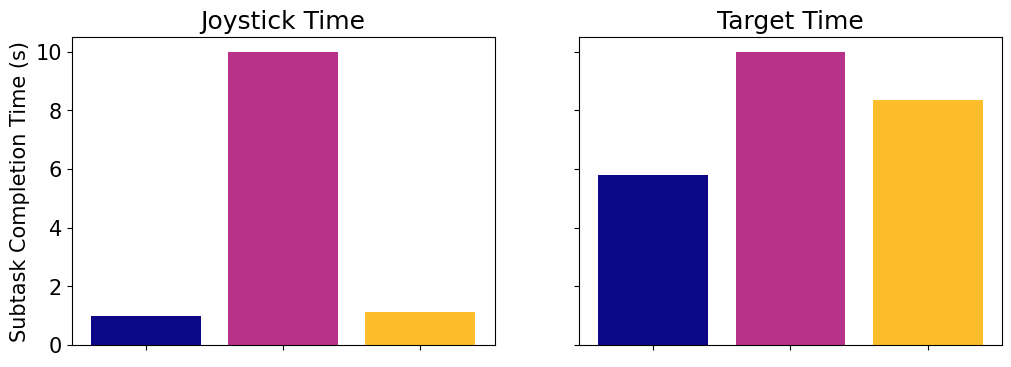

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
for i in range(len(all_variants)):
    bars1 = ax1.bar(i, sparse_df[all_variants[i]]['joystick_time'], color=colors[all_variants[i]])
    bars2 = ax2.bar(i, sparse_df[all_variants[i]]['target_time'], color=colors[all_variants[i]])

ax2.set_title('Target Time')
ax1.set_xticklabels([])
ax1.set_title('Joystick Time')
ax1.set_ylabel('Subtask Completion Time (s)')
ax2.set_title('Target Time')
ax2.set_xticklabels([])
ax2.set_xticklabels([])

plt.savefig("remote_control_variants/task_completion_time_bonus_dist")
plt.show()

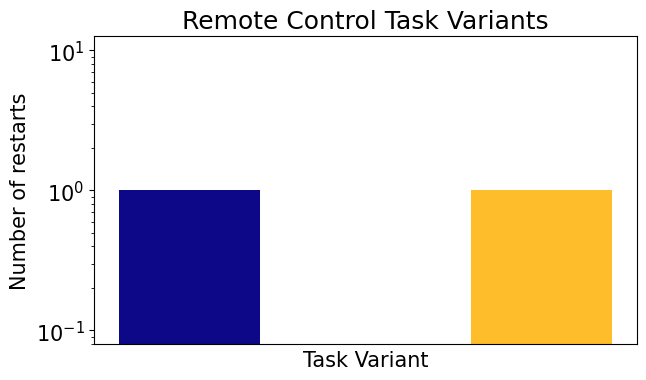

In [12]:
fig, ax = plt.subplots(figsize=(7, 4))

for i in range(len(all_variants)):
    ax.bar(i, sparse_df[all_variants[i]]['deviation_count'].mean(), label=all_variants[i], color=colors[all_variants[i]])

plt.title("Remote Control Task Variants")
plt.yticks(fontsize=fontsize)
plt.xticks([])
plt.yscale("log")
plt.xlabel("Task Variant", fontsize=fontsize)
plt.ylabel("Number of restarts", fontsize=fontsize)
plt.savefig("remote_control_variants/deviation_count_bonus_dist")

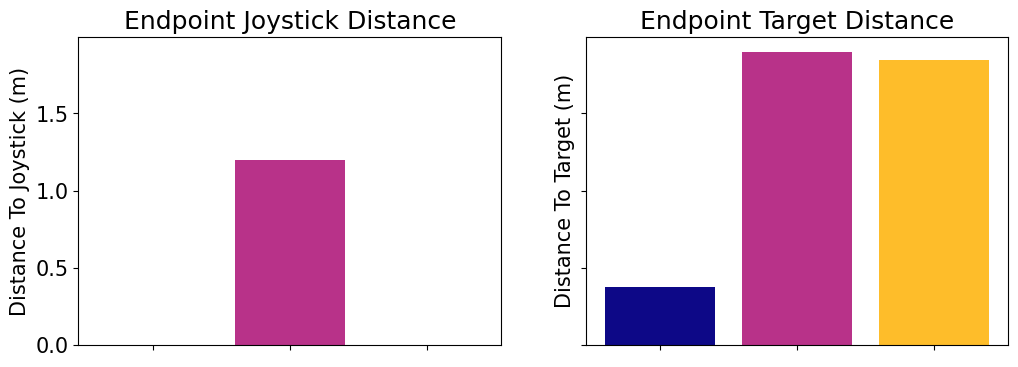

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

for i in range(len(all_variants)):
    ax1.bar(i, sparse_df[all_variants[i]]['endpoint_distance_to_joystick'].mean(), label=all_variants[i], color=colors[all_variants[i]])
    ax2.bar(i, sparse_df[all_variants[i]]['endpoint_distance_to_target'].mean(), label=all_variants[i], color=colors[all_variants[i]])

ax1.set_title('Endpoint Joystick Distance')
ax1.set_ylabel('Distance To Joystick (m)')
ax1.set_xticklabels([])
ax2.set_title('Endpoint Target Distance')
ax2.set_ylabel('Distance To Target (m)')
ax2.set_xticklabels([])
plt.savefig("remote_control_variants/end_point_distance_bonus_dist")